<a href="https://colab.research.google.com/github/Yasaman-habibi/Analysis-of-Sustainability-Reports/blob/main/FinalStep_01_FilteredData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files, drive
import pandas as pd
import matplotlib.pyplot as plt
import os
import io
import re

**برعکس عملکرد بالا؛ اول فیلتر و بعد ترکیب:**


In [ ]:
# 1. اتصال به گوگل درایو
drive.mount('/content/drive')

# 2. آپلود فایل‌های متنی
uploaded_Texts = files.upload()

# مسیر ذخیره‌سازی فایل خروجی در گوگل درایو
Combined_path = "/content/drive/MyDrive/Combined_Texts"
os.makedirs(Combined_path, exist_ok=True)
Combined_file = os.path.join(Combined_path, "Combined_Texts.txt")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving 20230306_10-K_edgar_data_25475_0000950170-23-006267.txt to 20230306_10-K_edgar_data_25475_0000950170-23-006267 (1).txt
Saving 20230306_10-K_edgar_data_105319_0000950170-23-006247.txt to 20230306_10-K_edgar_data_105319_0000950170-23-006247 (1).txt
Saving 20230306_10-K_edgar_data_800457_0001140361-23-010291.txt to 20230306_10-K_edgar_data_800457_0001140361-23-010291 (1).txt
Saving 20230306_10-K_edgar_data_839470_0001558370-23-002937.txt to 20230306_10-K_edgar_data_839470_0001558370-23-002937 (1).txt
Saving 20230306_10-K_edgar_data_876883_0000876883-23-000010.txt to 20230306_10-K_edgar_data_876883_0000876883-23-000010 (1).txt
Saving 20230306_10-K_edgar_data_884624_0000950170-23-006242.txt to 20230306_10-K_edgar_data_884624_0000950170-23-006242 (1).txt
Saving 20230306_10-K_edgar_data_885275_0001437749-23-005518.txt to 20230306_10-K_edgar_data_885275_0001437749-23-005518 (1).txt
Saving 20230306_10-K_edgar_data_891293_0000891293-23-000011.txt to 20230306_10-K_edgar_data_891293_0000891

In [ ]:
# 4. آپلود فایل دیکشنری Loughran-McDonald

uploaded_Dic = files.upload()
for filename in uploaded_Dic.keys():
    df_dict = pd.read_excel(io.BytesIO(uploaded_Dic[filename]))

Dic_path = "/content/drive/MyDrive/sustainability_table"
os.makedirs(Dic_path, exist_ok=True)
Dic_file = os.path.join(Dic_path, "Loughran-McDonald.xlsx")

df_dict.to_excel(Dic_file, index=False)


KeyboardInterrupt: 

In [ ]:
#برای خوندن فایل اکسل تا نیاز به هر بار اپلود نباشد

df_dict = pd.read_excel("/content/drive/MyDrive/sustainability_table/Loughran-McDonald.xlsx")
keywords = pd.read_excel("/content/drive/MyDrive/sustainability_table/keywords.xlsx")


In [ ]:
# 5. ساخت فایل keywords

# مسیر فایل
keywords_path = "/content/drive/MyDrive/sustainability_table"
os.makedirs(keywords_path, exist_ok=True)
keywords_file = os.path.join(keywords_path, "keywords.xlsx")

# لیست کلمات کلیدی نهایی
default_keywords = [
     "Sustainable" , "Sustainability" , "Sustainable finance" , "Sustainable innovation" , "Sustainable agriculture" ,
     "Sustainable materials" ,  "Sustainable supply chain" , "Sustainable development" ,
     "SDGs" , "ESG", "Non-Financial" , "Development" ,
     "Environmental" ,  "Environmental, social, and governance" , "Environmental protection", "Environmental impact" , "environment",
     "climate" , "Climate mitigation" , "Climate change" ,
     "Economic" , "Economic sustainability" , "Economy" , "Circular economy" , "Green economy" , "Green technology" ,
     "Social" , "Society" , "Corporate social responsibility" ,"CSR" ,
     "Carbon footprint", "Carbon emissions" ,  "Pollutants " ,  "Greenhouse Gas Emissions" ,  "Decarbonization" ,
     "Renewable energy" , "Clean energy" , "Energy efficiency" , "Recycling" , "Demographic changes" ,
     "Waste management" , "Zero waste" , "Natural Resources" , "Resource management" ,
     "Earth", "Air", "biodiversity",  "Crisis" ,  "Atmospheric" , "Water" , "pollution" , "Pollution reduction" ,
     "Drought" , "Famine" ,  "Water conservation" ,
     "Ground Warming" , "Global Warming" , "Species extinction" , "Ecosystem preservation" ,
     "Future Needs" ,  "Life cycle assessment" , "Eco-friendly" , "Responsible consumption" , "Human rights" ,
     "Better life",
]

# تبدیل به DataFrame نهایی
updated_keywords_df = pd.DataFrame(sorted(set(default_keywords)), columns=["keyword"])

# ذخیره فایل به‌روزرسانی‌شده
updated_keywords_df.to_excel(keywords_file, index=False)

# آماده‌سازی برای استفاده در برنامه
keywords = updated_keywords_df["keyword"].str.lower().tolist()


In [ ]:
# 6. ساخت مجموعه واژه‌های پایداری از دیکشنری بر مبنای keywords

sustain_terms = set()
for word in df_dict["Word"]:
    word_lower = str(word).lower()
    if any(key in word_lower for key in keywords):
        sustain_terms.add(word_lower)

print(f"{len(sustain_terms)} sustainability-related terms extracted.")


#  ذخیره ردیف‌های دیکشنری دز یک فایل جدید با استفاده از sustain_terms

sustain_Dic = df_dict[df_dict["Word"].str.lower().isin(sustain_terms)]


sustain_Dic_path = "/content/drive/MyDrive/sustainability_table"
os.makedirs(sustain_Dic_path, exist_ok=True)
sustain_Dic_file = os.path.join(sustain_Dic_path, "sustain_Dic.xlsx")

sustain_Dic.to_excel(sustain_Dic_file, index=False)

print(f"Filtered Excel file saved to: {sustain_Dic_path}")

540 sustainability-related terms extracted.
Filtered Excel file saved to: /content/drive/MyDrive/sustainability_table


In [ ]:
# 7. خواندن فایل های متنی برای انجام process

# ساخت و خواندن متن ترکیبی از فایل‌های آپلودشده
text = ""
for filename in uploaded_Texts.keys():
    with open(filename, "r", encoding="utf-8") as file:
        text += file.read() + "\n\n"



def split_paragraphs(text):
    # تقسیم متن بر اساس یک یا چند خط خالی (شامل فضاهای اضافی بین خطوط)
    paragraphs = [p.strip() for p in re.split(r'\n\s*\n', text) if p.strip()]
    return paragraphs


paragraphs = split_paragraphs(text)



In [ ]:
# 8: فیلتر کردن متن با استفاده از دیکشنری ساخته شده بر اساس کلمات پایداری

# بارگذاری مجدد sustain_Dic.xlsx برای استخراج واژه‌ها
sustain_Dic_path = "/content/drive/MyDrive/sustainability_table/sustain_Dic.xlsx"
sustain_Dic = pd.read_excel(sustain_Dic_path)


# استخراج واژه‌ها و ساخت مجموعه
sustain_terms = set(sustain_Dic["Word"].dropna().str.lower())



#  تابع بررسی وجود حداقل یک واژه پایداری در هر پاراگراف
def contains_sustain_terms(paragraph):
    words = paragraph.lower().split()
    words_clean = [word.strip(".,;:!?()[]{}\"'") for word in words]
    return any(word in sustain_terms for word in words_clean)


# فیلتر کردن پاراگراف‌های مرتبط با پایداری
filtered_paragraphs = [para for para in paragraphs if contains_sustain_terms(para)]


print(f"{len(filtered_paragraphs)} paragraphs contain sustainability-related terms.")

10117 paragraphs contain sustainability-related terms.


In [ ]:
# 9. ترکیب فقط پاراگراف‌های مرتبط با پایداری

# مسیر ذخیره‌سازی فایل خروجی
Combined_Sustain_text_path = os.path.join(Combined_path, "Combined_Sustain_text.txt")


# بررسی شماره فایل خروجی بعدی
def get_next_index(base_path, prefix="Combined_Sustain_text_", suffix=".txt"):
    existing_files = os.listdir(base_path)
    indices = []

    for fname in existing_files:
        match = re.match(fr"{re.escape(prefix)}(\d+){re.escape(suffix)}", fname)
        if match:
            indices.append(int(match.group(1)))
     # اگر فایلی نباشه، از 1 شروع می‌کنه
    return max(indices, default=0) + 1


#  گرفتن شماره فایل
file_index = get_next_index(Combined_path)
output_filename = f"Combined_Sustain_text_{file_index}.txt"
output_path = os.path.join(Combined_path, output_filename)

# باز کردن فایل برای ذخیره نتایج
with open(output_path, "w", encoding="utf-8") as outfile:
     # پردازش هر فایل آپلود شده
    for filename in uploaded_Texts.keys():
        with open(filename, "r", encoding="utf-8", errors="ignore") as infile:
            content = infile.read()

            # تقسیم متن به پاراگراف‌ها با استفاده از تابع تعریف شده
            paragraphs = split_paragraphs(content)

            # فیلتر کردن پاراگراف‌ها بر اساس کلمات پایداری
            filtered_paragraphs = [para for para in paragraphs if contains_sustain_terms(para)]


            # اگر پاراگراف فیلتر شده وجود دارد
            if filtered_paragraphs:
                 # نوشتن عنوان شروع هر فایل در فایل خروجی
                outfile.write(f"===== Start of File: {filename} =====\n")
                 # نوشتن پاراگراف‌های فیلتر شده
                for para in filtered_paragraphs:
                    outfile.write(para + "\n\n")
                # نوشتن عنوان پایان هر فایل در فایل خروجی
                outfile.write(f"===== End of File: {filename} =====\n\n")


print(f" پاراگراف‌های فیلتر شده ذخیره شدند در: {output_path}")


 پاراگراف‌های فیلتر شده ذخیره شدند در: /content/drive/MyDrive/Combined_Texts/Combined_Sustain_text_13.txt


In [ ]:
uploaded_Merged = files.upload()


merged_output_path = os.path.join(Combined_path, "Combined_Sustain_MERGED.txt")

with open(Combined_file, "w", encoding="utf-8") as outfile:
    for filename in uploaded_Merged.keys():
        with open(filename, "r", encoding="utf-8", errors="ignore") as infile:
            content = infile.read()
            outfile.write(content + "\n")


print(f"All text files have been combined into {Combined_file}")


Saving Combined_Sustain_text_20.txt to Combined_Sustain_text_20.txt
Saving Combined_Sustain_text_19.txt to Combined_Sustain_text_19.txt
Saving Combined_Sustain_text_18.txt to Combined_Sustain_text_18.txt
Saving Combined_Sustain_text_17.txt to Combined_Sustain_text_17.txt
Saving Combined_Sustain_text_16.txt to Combined_Sustain_text_16.txt
Saving Combined_Sustain_text_15.txt to Combined_Sustain_text_15.txt
Saving Combined_Sustain_text_14.txt to Combined_Sustain_text_14.txt
Saving Combined_Sustain_text_13.txt to Combined_Sustain_text_13.txt
Saving Combined_Sustain_text_11.txt to Combined_Sustain_text_11.txt
Saving Combined_Sustain_text_12.txt to Combined_Sustain_text_12.txt
Saving Combined_Sustain_text_10.txt to Combined_Sustain_text_10.txt
Saving Combined_Sustain_text_9.txt to Combined_Sustain_text_9.txt
Saving Combined_Sustain_text_8.txt to Combined_Sustain_text_8.txt
Saving Combined_Sustain_text_7.txt to Combined_Sustain_text_7.txt
Saving Combined_Sustain_text_6.txt to Combined_Sustain

In [ ]:
#10. ترکیب فایل های شماره گذاری ساخته شده

import glob

# مسیر فایل‌ها
merged_output_path = os.path.join(Combined_path, "Combined_Sustain_MERGED.txt")


# پیدا کردن تمام فایل‌های خروجی فیلتر شده (به ترتیب عددی)
files_to_merge = sorted(
    glob.glob(os.path.join(Combined_path, "Combined_Sustain_text_*.txt")),
    key=lambda x: int(re.search(r"_(\d+)\.txt$", x).group(1))
)


# ترکیب همه فایل‌ها
with open(merged_output_path, "w", encoding="utf-8") as outfile:
    for file_path in files_to_merge:
        with open(file_path, "r", encoding="utf-8") as infile:
            content = infile.read()
            outfile.write(content + "\n")


print(f" همه فایل‌ها با موفقیت ترکیب شدند.\n📄 مسیر فایل نهایی: {merged_output_path}")

 همه فایل‌ها با موفقیت ترکیب شدند.
📄 مسیر فایل نهایی: /content/drive/MyDrive/Combined_Texts/Combined_Sustain_MERGED.txt



 Summary Report:
• Total paragraphs scanned: ['<Header>\n<FileStats>\n    <FileName>20240108_10-Q-A_edgar_data_1743745_0001743745-24-000016.txt</FileName>\n    <GrossFileSize>9122067</GrossFileSize>\n    <NetFileSize>167271</NetFileSize>\n    <NonText_DocumentType_Chars>1316898</NonText_DocumentType_Chars>\n    <HTML_Chars>3619746</HTML_Chars>\n    <XBRL_Chars>1806109</XBRL_Chars>\n    <XML_Chars>2001713</XML_Chars>\n    <N_Exhibits>8</N_Exhibits>\n</FileStats>\n<SEC-Header>\n0001743745-24-000016.hdr.sgml : 20240108\n<ACCEPTANCE-DATETIME>20240105175542\nACCESSION NUMBER:\t\t0001743745-24-000016\nCONFORMED SUBMISSION TYPE:\t10-Q/A\nPUBLIC DOCUMENT COUNT:\t\t76\nCONFORMED PERIOD OF REPORT:\t20230630\nFILED AS OF DATE:\t\t20240108\nDATE AS OF CHANGE:\t\t20240105', 'FILER:', 'COMPANY DATA:\t\n\t\tCOMPANY CONFORMED NAME:\t\t\tGreenlane Holdings, Inc.\n\t\tCENTRAL INDEX KEY:\t\t\t0001743745\n\t\tSTANDARD INDUSTRIAL CLASSIFICATION:\tWHOLESALE-DURABLE GOODS, NEC [5099]\n\t\tORGANIZATION NAME:

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

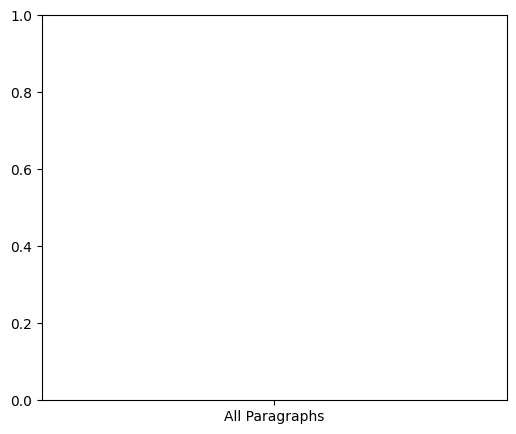

In [ ]:
# 9. گزارش عددی
print(f"\n Summary Report:")
print(f"• Total paragraphs scanned: {paragraphs}")
print(f"• Paragraphs related to sustainability: {filtered_paragraphs}")
print(f"• Filtered combined text saved to: {Combined_file}")



# 10. نمودار گرافیکی از تعداد پاراگراف‌ها
labels = ['All Paragraphs', 'Sustainability-related']
values = [paragraphs , filtered_paragraphs]
colors = ['lightgray', 'seagreen']

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=colors)
plt.title('Paragraph Filtering Report')
plt.ylabel('Number of Paragraphs')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



---



---



In [ ]:
# ضروری نیست
#  ذخیره خروجی در فایل اکسل

filtered_df = pd.DataFrame(filtered_paragraphs, columns=["Filtered_Paragraphs"])
filtered_df.to_excel("filtered_paragraphs.xlsx", index=False)

print("خروجی در فایل filtered_paragraphs.xlsx ذخیره شد.")


In [ ]:
# ضروری نیست
# نوع دیگری از ذخیره پاراگراف های فیلتر شده
output_text = ""
for i, para in enumerate(filtered_paragraphs, 1):
    output_text += f"[پاراگراف {i}]\n{para}\n\n"

# ذخیره در فایل
with open(Combined_path, "w", encoding="utf-8") as f:
    f.write(output_text)

print(f" {len(filtered_paragraphs)} پاراگراف در فایل ذخیره شدند:\n{Combined_path}")
